In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mall_customers = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Mall_Customers.csv")

In [ ]:
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### Is there any Null Values ?

In [ ]:
mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###### EDA

<Axes: xlabel='Annual Income (k$)', ylabel='count'>

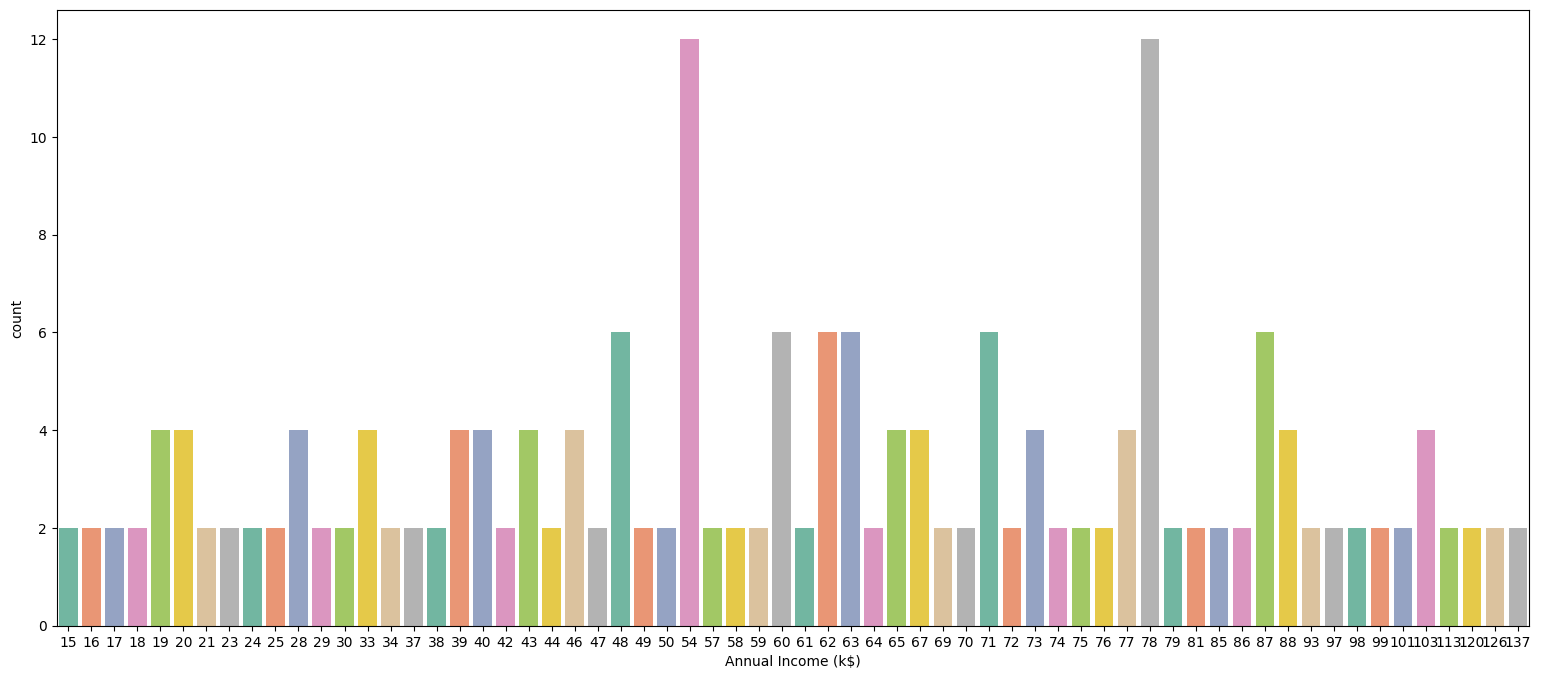

In [ ]:
plt.figure(figsize = (19, 8))
sns.countplot(x = 'Annual Income (k$)' , data = mall_customers, palette = 'Set2')

<Axes: xlabel='Spending Score (1-100)', ylabel='count'>

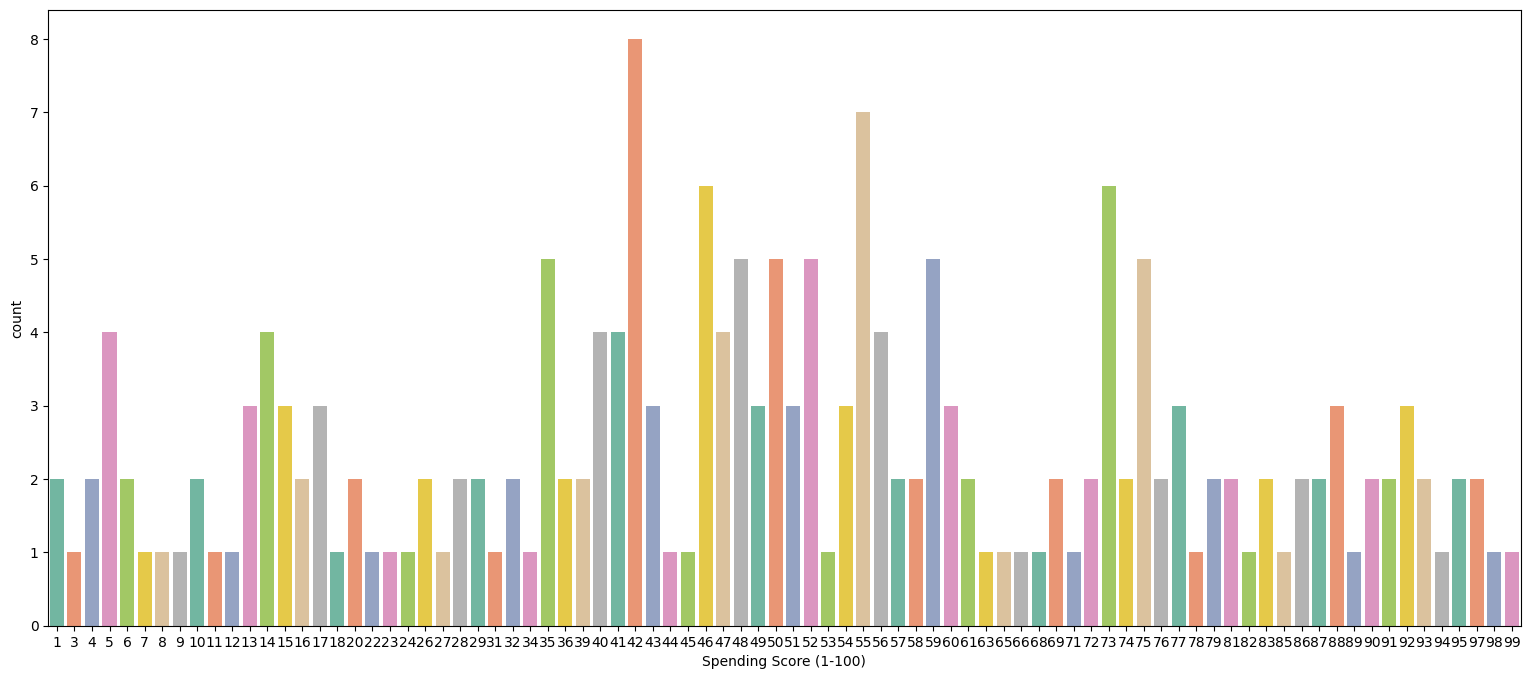

In [ ]:
plt.figure(figsize = (19, 8))
sns.countplot(x = 'Spending Score (1-100)' , data = mall_customers, palette = 'Set2')

##### Features

In [ ]:
X = mall_customers.iloc[:,3:5]

In [ ]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


##### Elbow Method
    * Plot between WCSS and K (Range of Clusters)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,16):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)   # WCSS is returned by inertia_

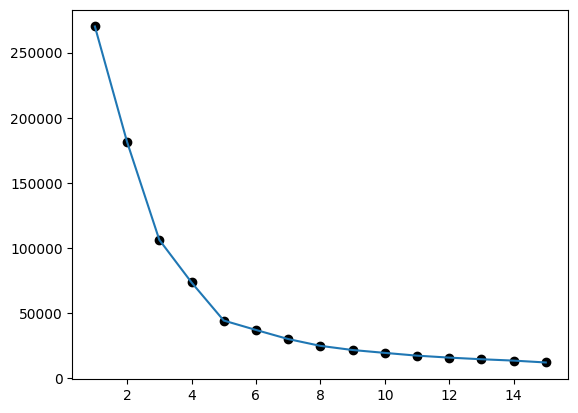

In [ ]:
plt.plot(range(1,16), wcss)
plt.scatter(x = range(1,16), y = wcss, color = 'black',marker = 'o')
plt.show()

##### Final Cluster using K = 5

In [ ]:
# n_cluster = value of 'K',
# init = 'kmeans++' model is used to choose random cluster centroid,
# n_init = num of iteration for choosing initial centroid values
# max_iter = maximum iterations
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10)

In [ ]:
# cluster centoids
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [ ]:
# Predicted Clusters
y_predict = kmeans.predict(X)

In [ ]:
X ['Clusters'] = y_predict

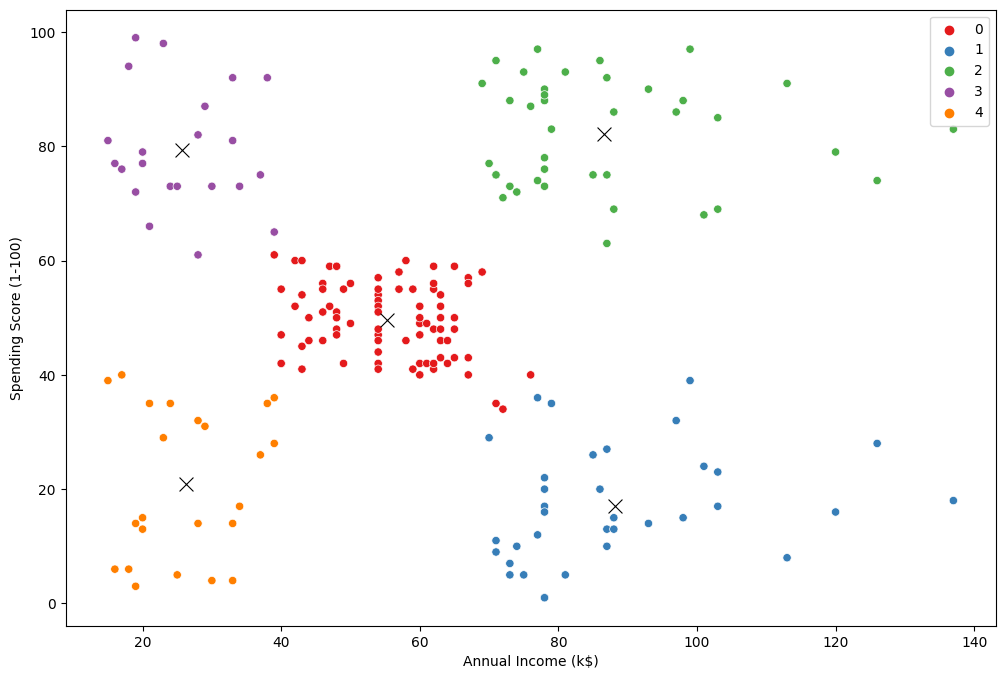

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='Annual Income (k$)',y = 'Spending Score (1-100)',hue='Clusters', data = X,
                palette = 'Set1')
sns.scatterplot(x = kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c = 'black',
            marker = 'x', s = 100)
plt.show()

###### Hierarchical Clustering
    * It is tree like structure to choose optimum number of clusters in hierarchical clustering

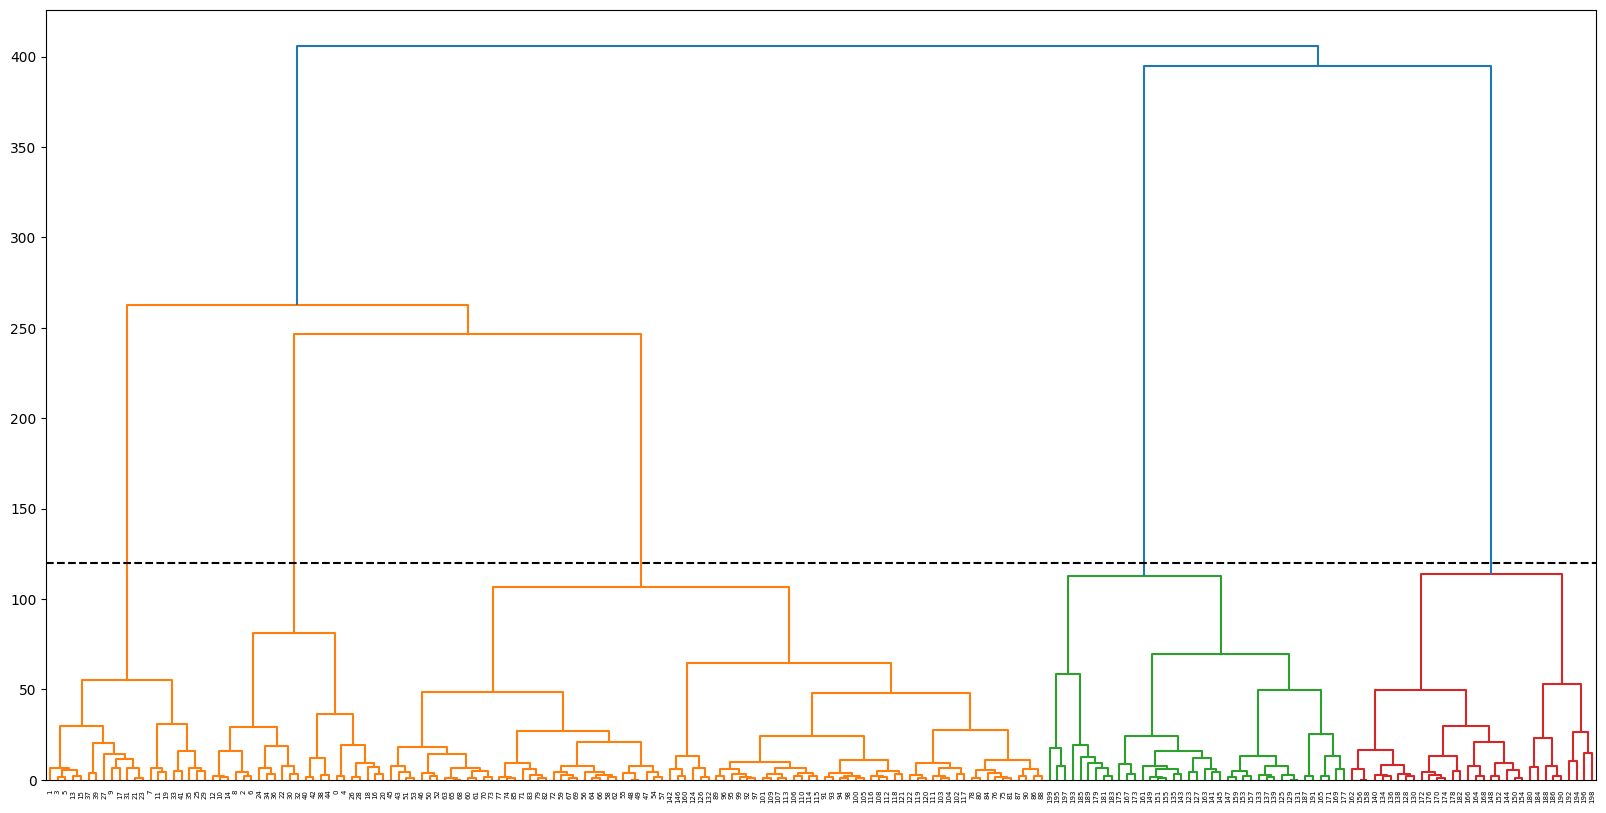

In [ ]:
import scipy.cluster.hierarchy as sch
fig = plt.figure(figsize = (20,10))
# method = 'ward','single','complete'
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y = 120, linestyle = '--', color = 'k')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage='ward',affinity = 'euclidean')

In [ ]:
hc.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
X ['Clusters'] = y_hc

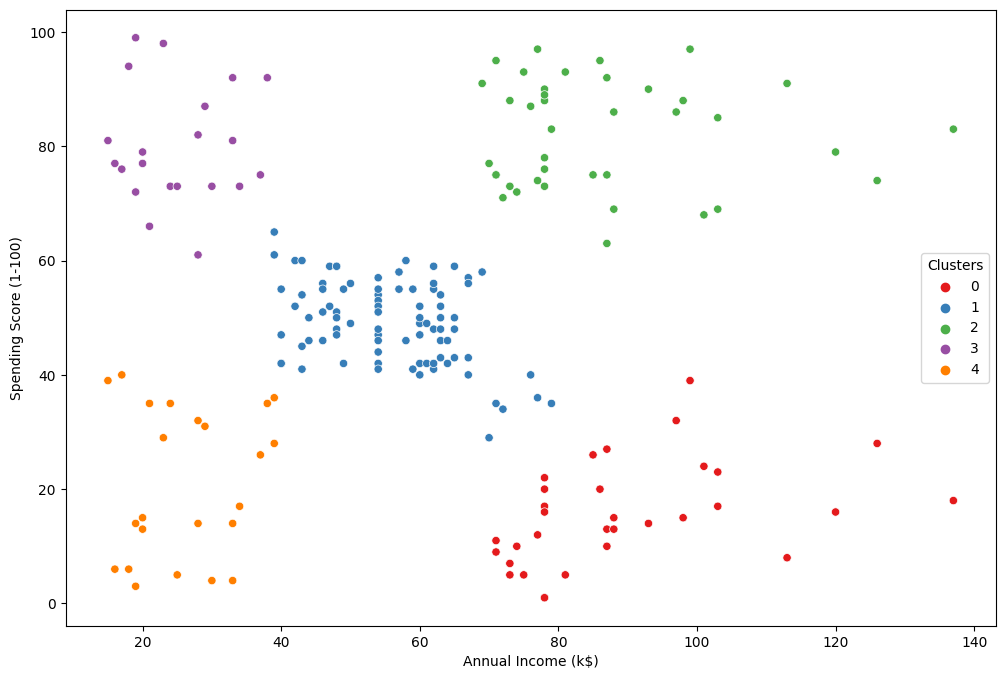

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='Annual Income (k$)',y = 'Spending Score (1-100)',hue='Clusters', data = X,
                palette = 'Set1')
plt.show()